In [2]:
import cv2 
import matplotlib.pyplot as plt
import cv2
import os
import pandas as pd

In [3]:
train_data = pd.read_csv("train_data.csv")

In [ ]:
def color(thresh, existing_mask, path):
    thresh_colored = cv2.cvtColor(thresh, cv2.COLOR_GRAY2BGR)
    
    overlap_mask = cv2.inRange(thresh, 255, 255)
    
    for i in range(thresh_colored.shape[0]):
        for j in range(thresh_colored.shape[1]):
            if overlap_mask[i, j] == 255:
                thresh_colored[i, j] = existing_mask[i, j]
    
    thresh_colored_rgb = cv2.cvtColor(thresh_colored, cv2.COLOR_BGR2RGB)
    
    output_path = os.path.join("Data_Set_Larch_Casebearer/Masks/", path + ".png")
    
    cv2.imwrite(output_path, thresh_colored_rgb)


In [ ]:
for i in range(len(train_data)):
    image = cv2.imread(train_data.iloc[i]["image"])
    mask = cv2.imread(train_data.iloc[i]["Mask"])
    img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    ret, thresh = cv2.threshold(img_gray, 150, 255, cv2.THRESH_BINARY)
    color(thresh,mask,train_data.iloc[i]["Mask"].split("/")[-1][:-4])

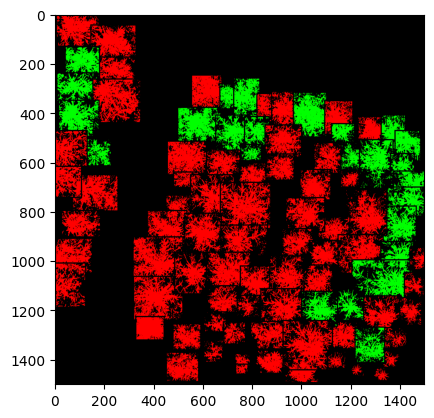

In [12]:
image = cv2.imread(train_data.iloc[0]["Mask"])[...,::-1]
plt.imshow(image)